<a href="https://colab.research.google.com/github/kalai2315/Customer_churn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

You are the data scientist at a telecom company named “Neo” whose customers
are churning out to its competitors. You have to analyze the data of your
company and find insights and stop your customers from churning out to other
telecom companies.

**DOMAIN: Telecom**

**Link to Dataset:** https://drive.google.com/file/d/1E4cOoS3YQA1WF49yt6sqhs4tNlJTPnbl/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
df=pd.read_csv('/content/customer_churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Insights**
  * **We have a lot of categorical values, this means we will have to do encoding**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Insights**
  * **Assumptions that there are no null values**
  * **There is no duplicates in the data, since we are having all unique customer ID**
  * **The `TotalCharges` column is having some ambiguity need to check**

In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Data Preprocessing**

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df=df.dropna()

**Duplicate Analysis:**

In [10]:
df.duplicated().sum()

0

**Data Manipulation:**

1. Extract the 5th column and store it in ‘customer_5’

In [11]:
customer_5 = df.iloc[:, 4]

In [12]:
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


2. Extract the 15th column and store it in ‘customer_15’

In [13]:
customer_15 = df.iloc[:, 14]
customer_15.head()

,StreamingMovies
0,No
1,No
2,No
3,No
4,No


3. Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


In [17]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


In [18]:
senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]


In [19]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


4. Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’

In [20]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
38,59
28,57
39,56


In [21]:
customer_total_tenure= df[(df['tenure']>70) & (df['MonthlyCharges']>100)]
customer_total_tenure.head()
len(customer_total_tenure)

175

6. Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’

In [22]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


In [23]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [24]:
two_mail_yes = df[(df['Contract']=='Two year') &(df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes.head()
len(two_mail_yes)

3

7. Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’

In [25]:
customer_333 = df.sample(n=333, random_state=42)
customer_333.shape

(333, 21)

8. Get the count of different levels from the ‘Churn’ column

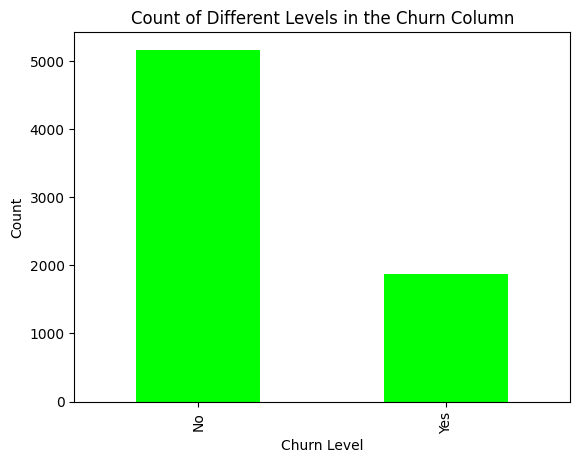

In [26]:
churn_counts = df['Churn'].value_counts().plot(kind='bar', color = 'lime')
churn_counts.set_title('Count of Different Levels in the Churn Column')
churn_counts.set_xlabel('Churn Level')
churn_counts.set_ylabel('Count')
plt.show()
#

9.  Get the count of different levels from the ‘Contract’ column

Text(0.5, 0, 'Contract Level')

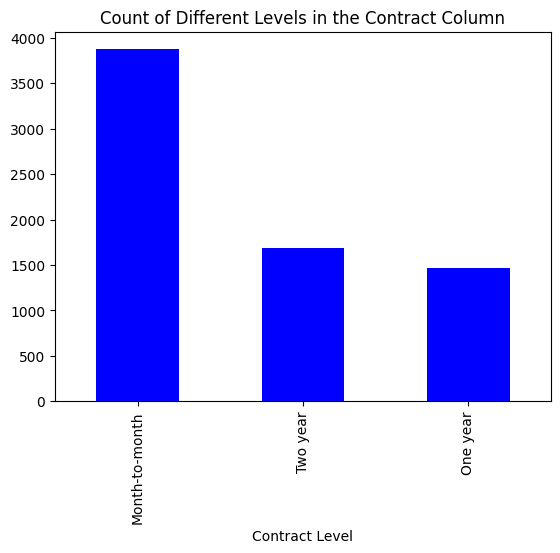

In [27]:
contract_counts = df['Contract'].value_counts().plot(kind='bar', color = 'blue')
contract_counts.set_title('Count of Different Levels in the Contract Column')
contract_counts.set_xlabel('Contract Level')

10. Visualize the ’InternetService’ column:


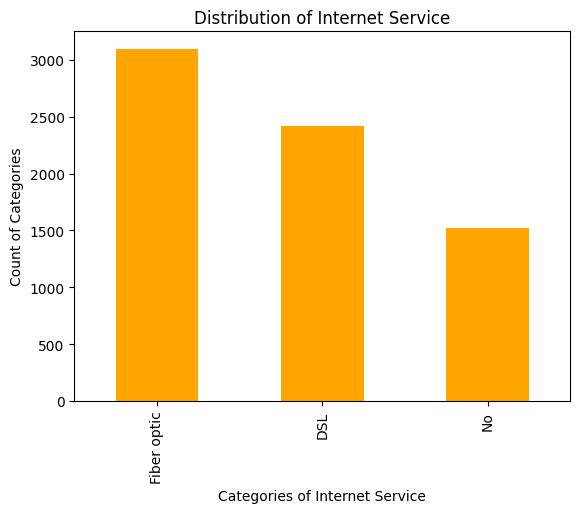

In [28]:
Internet_Service =df['InternetService'].value_counts().plot(kind='bar', color = 'orange')
Internet_Service.set_title('Distribution of Internet Service')
Internet_Service.set_xlabel('Categories of Internet Service')
Internet_Service.set_ylabel('Count of Categories')
plt.show()


11. Cross-tabulation table displaying the relationship between InternetService types and Churn.

In [29]:
churn_crosstab = pd.crosstab(df['InternetService'], df['Churn'])
print(churn_crosstab)

Churn              No   Yes
InternetService            
DSL              1957   459
Fiber optic      1799  1297
No               1407   113


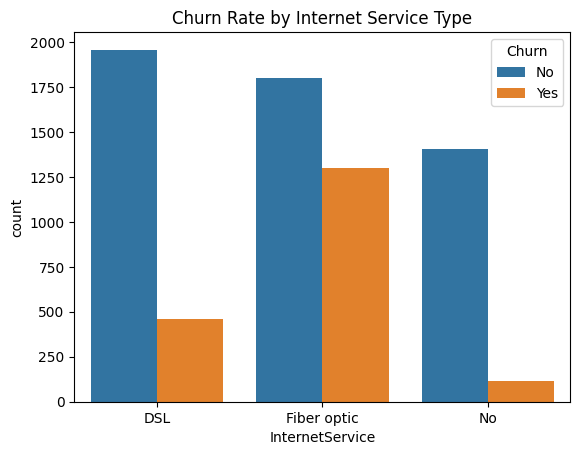

In [30]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Rate by Internet Service Type')
plt.show()

Customers without internet service are less likely to churn compared to those with internet services, especially fiber optic. Targeted strategies to improve service and customer satisfaction among DSL and fiber optic users could help reduce churn rates.

12. Histogram for the ‘tenure’ column:



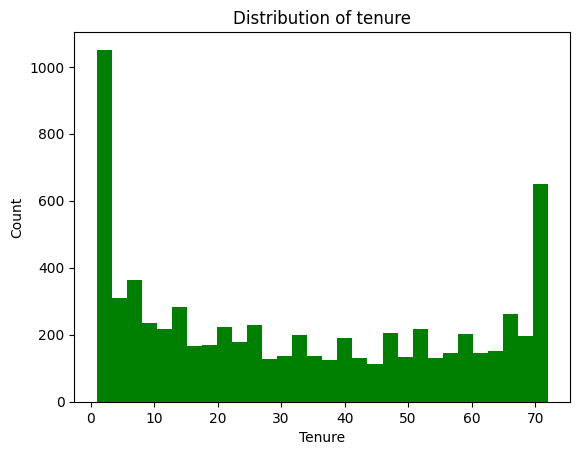

In [31]:
Tenure=df['tenure'].plot(kind = 'hist', bins =30, color ='green')
Tenure.set_title('Distribution of tenure')
Tenure.set_xlabel('Tenure')
Tenure.set_ylabel('Count')
plt.show()

● Scatter-plot between ‘MonthlyCharges’ and ‘tenure’.


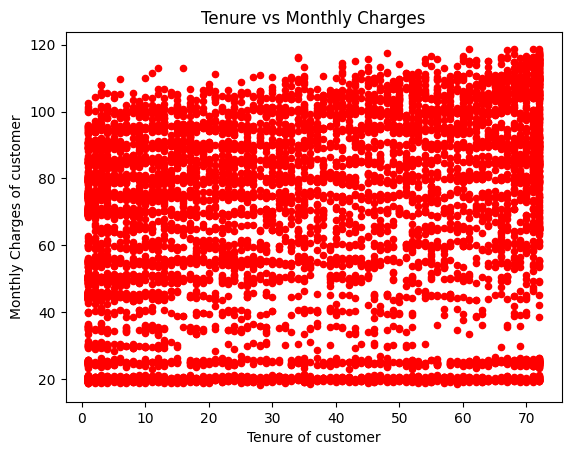

In [32]:
Charges_tenure = df.plot(kind = 'scatter', x = 'tenure', y = 'MonthlyCharges', color = 'red')
Charges_tenure.set_xlabel('Tenure of customer')
Charges_tenure.set_ylabel('Monthly Charges of customer')
Charges_tenure.set_title('Tenure vs Monthly Charges')
plt.show()

Distribution of monthly charges by churn

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

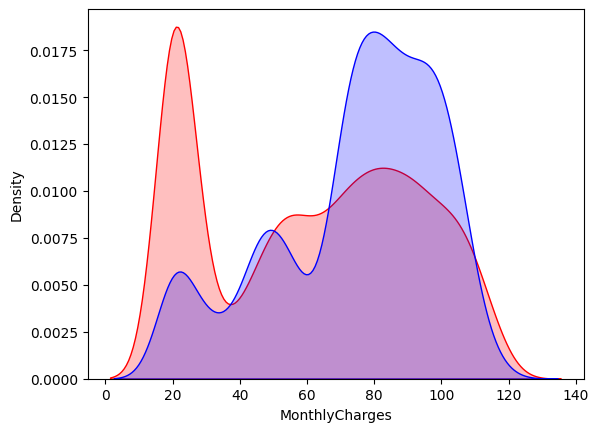

In [33]:
sns.kdeplot(df.MonthlyCharges[(df['Churn']=='No')], color = 'Red', shade = True)
sns.kdeplot(df.MonthlyCharges[(df['Churn']=='Yes')], color = 'Blue', shade = True)


churn_counts.legend(["Not Churn","Churn"],loc='best')
churn_counts.set_ylabel('Density')
churn_counts.set_xlabel('Monthly Charges')
churn_counts.set_title('Distribution of monthly charges by churn')

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
for x in df.columns:
  if df[x].dtype == 'object':
    df[x] = le.fit_transform(df[x])


In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [37]:
df=df.drop('customerID',axis=1)

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Feature Selection:**

<Axes: >

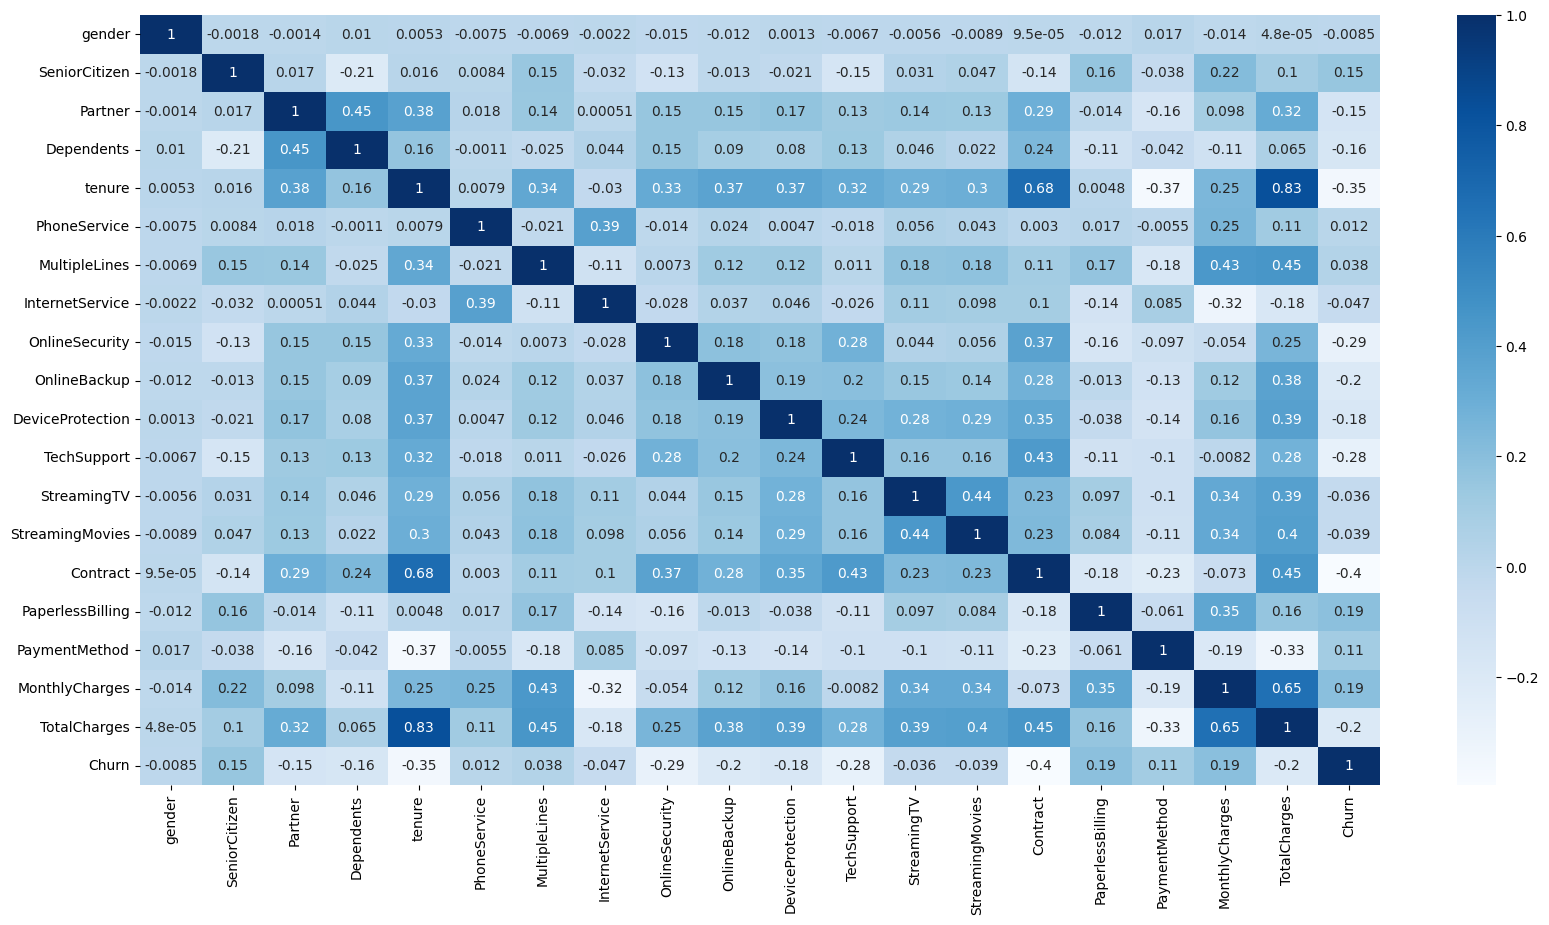

In [39]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

**Insights**
  * ** From the correlation heatmap, we can clearly see that there is no such column that is having a very strong influence on the target column. Moreover, there are very less columns that are having a strong relationship with between them.**

**Feature Selection Based on Target (Churn):**

*   Contract has a negative correlation with Churn (-0.40), which means longer-term
contracts might reduce churn.

*   
TechSupport also has a negative correlation with Churn (-0.28). Providing tech support may help in retaining customers.


*   tenure is negatively correlated with Churn (-0.35), indicating that customers who have been with the service for a longer time are less likely to churn.
*   Features with low correlation values close to 0 with Churn may not be very useful for predicting churn directly (e.g., gender, PhoneService, MultipleLines).












**Ignore Features with Near-Zero Correlation with Churn:**

Features like gender, PhoneService, and MultipleLines have correlations close to zero with churn, suggesting they may not contribute significantly to predicting churn.

**Handling Multicollinearity:**

Features with high correlation with each other (e.g., MonthlyCharges and TotalCharges, Partner and Dependents) could lead to multicollinearity, which might affect model performance.So we use techniques like **Variance Inflation Factor (VIF)** to detect and handle multicollinearity.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF


In [41]:
column_list = []
for x in df.columns:
  if ((df[x].dtype != 'object') & (x != 'Churn')):
    column_list.append(x)

In [42]:
column_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [43]:
# Need Data
X = df[column_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [44]:
vif_data

,Features,VIF
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


High VIF values in features like MonthlyCharges, TotalCharges, and tenure suggest strong multicollinearity, which can affect model stability and performance. Hence we will drop the highest VIF Value.

In [45]:
df = df.drop("MonthlyCharges", axis = 1)

**Iteration 2**

In [46]:
column_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    column_list.append(x)

# Need Data
X = df[column_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [47]:
vif_data

,Features,VIF
0,gender,1.936952
1,SeniorCitizen,1.343210
2,Partner,2.814039
3,Dependents,1.957317
4,tenure,13.942277
5,PhoneService,8.202506
6,MultipleLines,2.511962
7,InternetService,3.646896
8,OnlineSecurity,2.247428
9,OnlineBackup,2.454485


In [48]:
df = df.drop("tenure", axis = 1)

In [49]:
column_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    column_list.append(x)

# Need Data
X = df[column_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [50]:
vif_data

,Features,VIF
0,gender,1.919674
1,SeniorCitizen,1.341260
2,Partner,2.749816
3,Dependents,1.955831
4,PhoneService,8.200629
5,MultipleLines,2.499564
6,InternetService,3.491818
7,OnlineSecurity,2.228559
8,OnlineBackup,2.441964
9,DeviceProtection,2.617616


In [51]:
df = df.drop("PhoneService", axis = 1)

In [52]:
column_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    column_list.append(x)

# Need Data
X = df[column_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [53]:
vif_data

,Features,VIF
0,gender,1.864278
1,SeniorCitizen,1.336778
2,Partner,2.739901
3,Dependents,1.949167
4,MultipleLines,2.492203
5,InternetService,2.529810
6,OnlineSecurity,2.196135
7,OnlineBackup,2.437734
8,DeviceProtection,2.616390
9,TechSupport,2.357595


In [54]:
df = df.drop("TotalCharges", axis = 1)

In [55]:
column_list = []
for x in df.columns:
  if((df[x].dtype != 'object') & (x!='Churn')):
    column_list.append(x)

# Need Data
X = df[column_list]
# Create a new DataFrame this df will be used for storing the values of VIF
vif_data = pd.DataFrame()
# We are going to put all the features
vif_data["Features"] = X.columns
# Here we will calculate VIF
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]

In [56]:
vif_data

,Features,VIF
0,gender,1.864003
1,SeniorCitizen,1.324977
2,Partner,2.662983
3,Dependents,1.933842
4,MultipleLines,2.174970
5,InternetService,2.328254
6,OnlineSecurity,2.158788
7,OnlineBackup,2.277208
8,DeviceProtection,2.537876
9,TechSupport,2.348584


# **Model Building and Evaluation**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
# Independent Columns
x = X

# Target Columns
y = df["Churn"]

In [ ]:
x.shape

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 43)

In [61]:
x_train.shape, x_test.shape

((5274, 15), (1758, 15))

In [62]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3940,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3346,0,1,0,0,2,1,0,0,0,0,0,2,0,1,2
143,1,0,0,0,2,1,2,2,0,0,0,0,1,1,1
4204,1,1,0,0,0,1,0,2,0,0,0,2,0,1,2
4386,1,0,1,1,0,0,2,2,0,2,0,0,2,0,0


In [64]:
pred = model.predict(x_test)

**Accuracy Score is the measure of values that are correctly predicted out of all the testing data**

In [65]:
print("Accuracy score: ", accuracy_score(y_test, pred))

Accuracy score:  0.7724687144482366


In [66]:
print("Error: ", 1 - accuracy_score(y_test, pred))

Error:  0.22753128555176338


In [67]:
cm = confusion_matrix(y_test, pred)

<img src = "https://imgs.search.brave.com/BR4P9p1EpodmgASQ0__ml5QDEBuLBV17CjBa7Ft-T3c/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9zdGF0/aWMuamF2YXRwb2lu/dC5jb20vdHV0b3Jp/YWwvbWFjaGluZS1s/ZWFybmluZy9pbWFn/ZXMvY29uZnVzaW9u/LW1hdHJpeC5wbmc"/>

In [68]:
cm

array([[1151,  134],
       [ 266,  207]])

<hr>

**Classification Report**
  * **True Positive (TP): The actual value was positive, and the model predicted a positive value.**
  * **True Negative (TN): The actual value was negative, and the model predicted a negative value.**
  * **False Positive (FP) – Type I Error: The actual value was negative, but the model predicted a positive value. `Also known as the type I error.`**
  * **False Negative (FN) – Type II Error: he actual value was positive, but the model predicted a negative value. `Also known as the type II error`.**

<hr>

**Precision vs. Recall**
  * **Precision tells us how many of the correctly predicted cases actually turned out to be positive. `(TP / TP + FP)`. `This would determine whether our model is reliable or not.`**

  * **Recall tells us how many of the actual positive cases we were able to predict correctly with our model. `(TP / TP + FN)`. `This is used to make sure that the actual positive cases should not go undetected!`**







In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1285
           1       0.61      0.44      0.51       473

    accuracy                           0.77      1758
   macro avg       0.71      0.67      0.68      1758
weighted avg       0.76      0.77      0.76      1758

